Prajakta Patil : E22CSEU0912

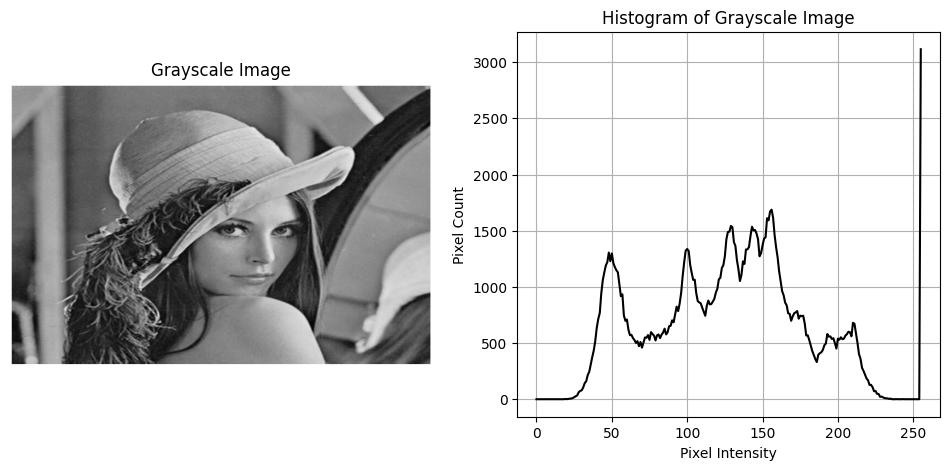

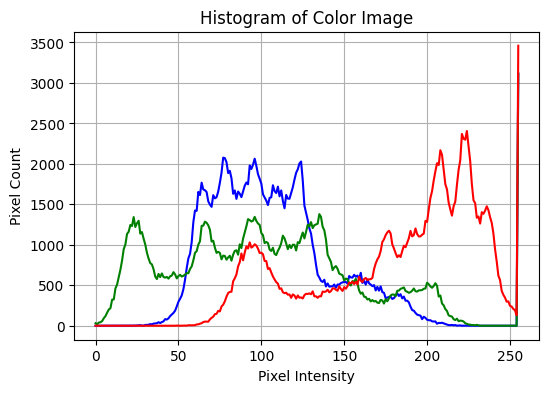

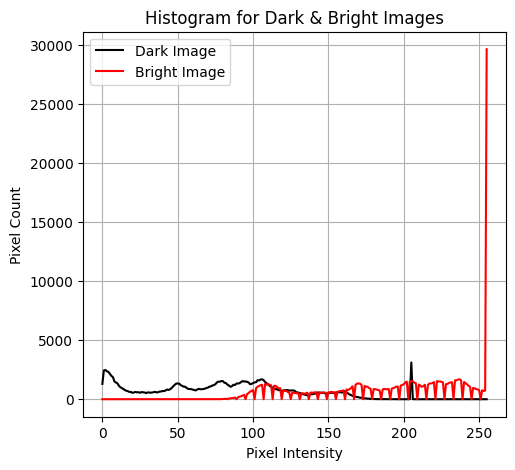

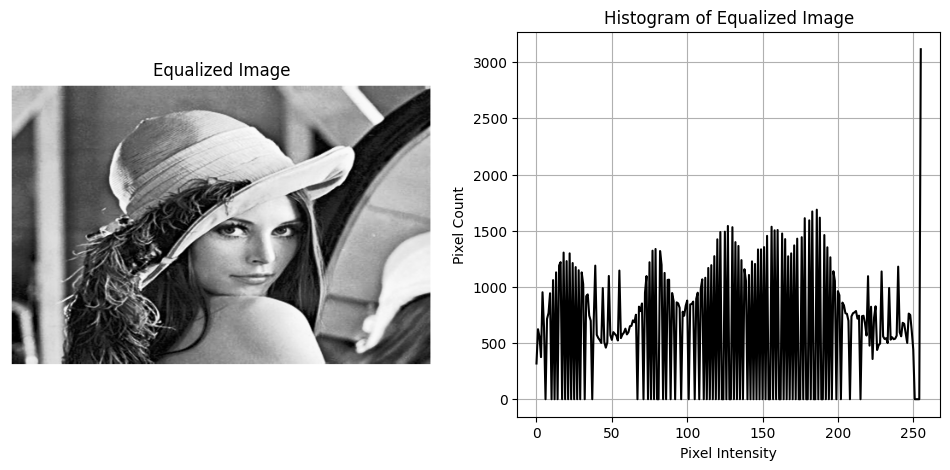

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Image2.png")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

colors = ('b', 'g', 'r')
hist_color = {}
for i, color in enumerate(colors):
    hist_color[color] = cv2.calcHist([image], [i], None, [256], [0, 256])

# Plot Grayscale Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_gray, color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.grid()
plt.show()

# Plot Color Histogram
plt.figure(figsize=(6, 4))
for color, hist in hist_color.items():
    plt.plot(hist, color=color)
plt.title("Histogram of Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.grid()
plt.show()

# Bright & Dark Image Analysis
bright_image = cv2.convertScaleAbs(gray_image, alpha=1.2, beta=50)  # Inc
dark_image = cv2.convertScaleAbs(gray_image, alpha=1.0, beta=-50)   # Dec

hist_bright = cv2.calcHist([bright_image], [0], None, [256], [0, 256])
hist_dark = cv2.calcHist([dark_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_dark, color='black', label='Dark Image')
plt.plot(hist_bright, color='red', label='Bright Image')
plt.legend()
plt.title("Histogram for Dark & Bright Images")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.grid()
plt.show()

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_eq, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.grid()
plt.show()


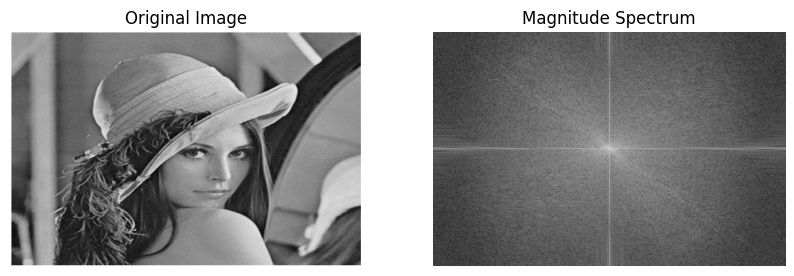

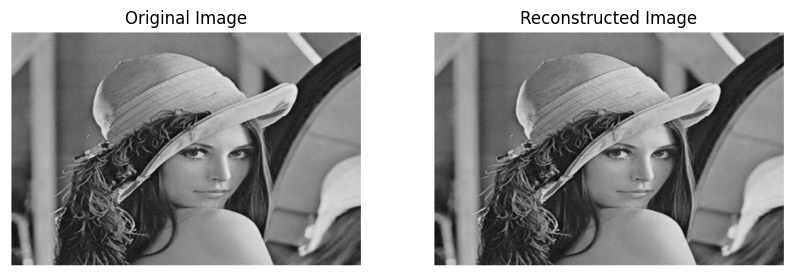

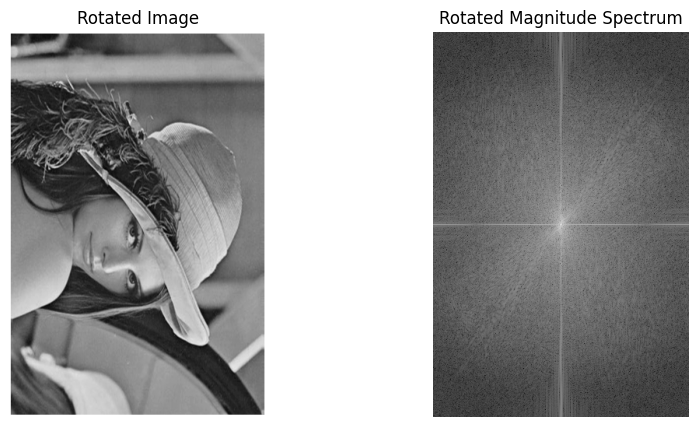

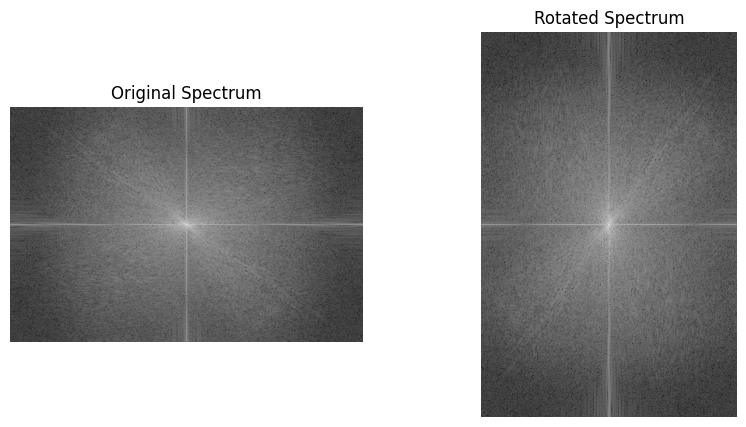

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_dft(image):
    dft = np.fft.fft2(image)  # Compute DFT
    dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Log scaling for better visualization
    return dft, dft_shift, magnitude_spectrum

def compute_ifft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)  # Shift back
    img_reconstructed = np.fft.ifft2(dft_ishift)  # Compute inverse DFT
    img_reconstructed = np.abs(img_reconstructed)  # Take absolute values
    return img_reconstructed

def plot_images(images, titles, cmap='gray'):
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load and convert image to grayscale
image = cv2.imread("Image2.png", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise Exception("Image not found!")

dft, dft_shift, magnitude_spectrum = compute_dft(image)
plot_images([image, magnitude_spectrum], ["Original Image", "Magnitude Spectrum"])

# Compute and display IFFT (Reconstruction)
reconstructed_image = compute_ifft(dft_shift)
plot_images([image, reconstructed_image], ["Original Image", "Reconstructed Image"])

# Rotation Property Verification
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotate 90 degrees
dft_rot, dft_shift_rot, magnitude_spectrum_rot = compute_dft(rotated_image)
plot_images([rotated_image, magnitude_spectrum_rot], ["Rotated Image", "Rotated Magnitude Spectrum"])

# Compare magnitude spectrums
plot_images([magnitude_spectrum, magnitude_spectrum_rot], ["Original Spectrum", "Rotated Spectrum"])

plt.show()